In [3]:
!pip install diagrams

     |████████████████████████████████| 23.8 MB 115.0 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


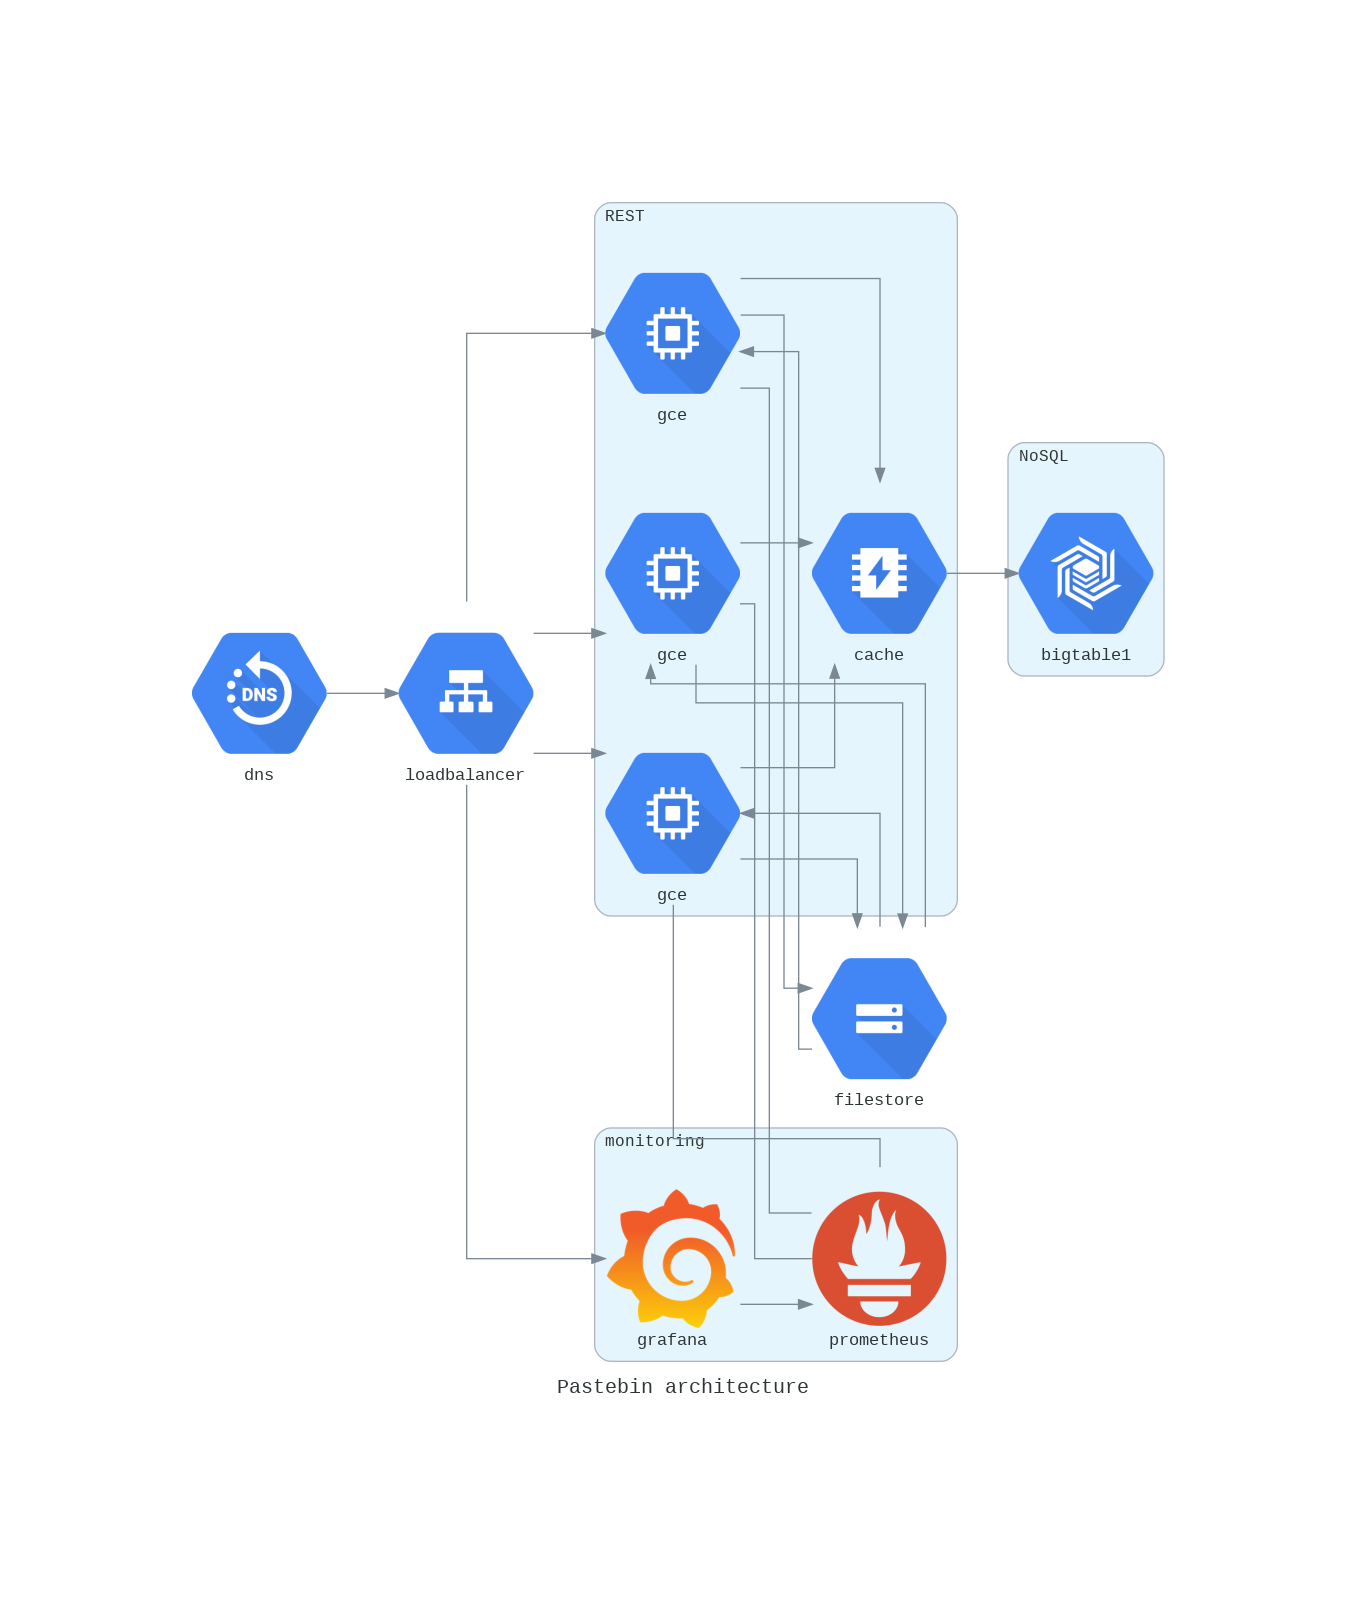

In [4]:
from diagrams import Diagram
from diagrams import Cluster
from diagrams.gcp.network import LoadBalancing, DNS
from diagrams.gcp.database import BigTable,Memorystore
from diagrams.gcp.storage import Storage
from diagrams.gcp.compute import ComputeEngine
from diagrams.onprem.monitoring import Prometheus, Grafana


with Diagram("Pastebin architecture",show=False) as paste_bin:
    dns = DNS("dns")
    elb = LoadBalancing("loadbalancer")
    with Cluster("REST"):
        gces = [ComputeEngine("gce") for  _  in range(3)]
        cache_m = Memorystore("cache")

    with Cluster("NoSQL"):
        db = BigTable("bigtable1")
    store = Storage("filestore")
    with Cluster("monitoring"):
        prom = Prometheus("prometheus")
        graf = Grafana("grafana")

    dns >> elb 
    elb >> gces
    elb >> graf
    gces >> cache_m >> db
    gces >>  store >> gces
    gces - prom
    graf >> prom
 
paste_bin

# New Section